In [232]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from skimage.color import rgb2lab
from PIL import Image
import numpy as np

In [243]:
# Data Preparation
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([transforms.Resize((400, 400)),
                                    transforms.ToTensor()])
    img = transform(image)
    lab_image = rgb2lab(np.array(image))
    X = lab_image[:, :, 0]
    Y = lab_image[:, :, 1:]
    X = X.reshape(1, 1, 400, 400)
    Y = Y.reshape(1, 2, 400, 400)
    return torch.Tensor(X), torch.Tensor(Y)

# preprocess_image('woman.jpg')

SyntaxError: invalid syntax (3474895688.py, line 9)

In [234]:
class ColorizationModel(nn.Module):
    def __init__(self):
        super(ColorizationModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, 3,padding=1, stride=2),  # Assuming grayscale input images
            nn.ReLU(),
            nn.Conv2d(8, 8, 3,padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3,padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, 3,padding=1, stride=2),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3,padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3,padding=1, stride=2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(32, 16, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(16, 2, 3, padding=1),
            nn.Sigmoid()  # Using Sigmoid as the final activation
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x * 127.0  # Normalize with 255


In [235]:
model = ColorizationModel()

# defining loss and optmizer
criterion = nn.MSELoss()
optimizer = optim.RMSprop(params=model.parameters(), lr=0.001) 

In [236]:
for epoch in range(100):
    X, Y = preprocess_image('woman.jpg')
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()

In [240]:
model.eval()
with torch.no_grad():
    X, _ = preprocess_image('woman.jpg')
    output = model(X)
print(loss.item())

0.009549479931592941


C:\Users\Admin\AppData\Local\Temp\ipykernel_19148\2867827807.py:4: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 1 negative Z values that have been clipped to zero
  plt.imshow(lab2rgb(output_np))


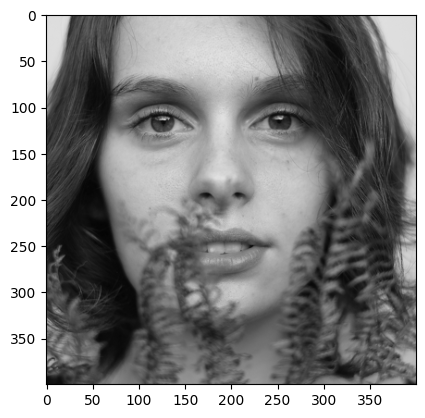

tensor([[[[87.9215, 87.5695, 87.9809,  ..., 88.2732, 88.2732, 87.9215],
          [87.5695, 87.9215, 87.9512,  ..., 88.2732, 87.9215, 88.2192],
          [87.9215, 88.2732, 87.9215,  ..., 87.9215, 87.9215, 87.3793],
          ...,
          [ 3.4114,  3.7141,  4.0522,  ..., 36.6781, 39.9218, 41.0422],
          [ 3.7536,  3.7141,  4.0720,  ..., 28.3482, 31.9554, 32.8455],
          [ 2.8329,  3.3916,  4.0522,  ..., 15.7837, 23.0261, 23.0261]]]])
tensor([[[[8.1535e-04, 3.8892e-12, 1.0173e-15,  ..., 1.5691e-25,
           3.5561e-21, 1.6039e-09],
          [3.8797e-13, 4.4642e-30, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 4.4346e-24],
          [2.0155e-15, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 1.7985e-28],
          ...,
          [2.4352e-03, 2.6244e-11, 9.8886e-15,  ..., 0.0000e+00,
           0.0000e+00, 1.2878e-21],
          [1.9571e-02, 7.1279e-09, 5.0489e-12,  ..., 0.0000e+00,
           0.0000e+00, 2.9225e-18],
          [4.2674e+01, 1.7310e

In [242]:
from skimage.color import lab2rgb
# output*=127
output_np = torch.cat((X, output), dim=1).squeeze().permute(1, 2, 0).numpy()
plt.imshow(lab2rgb(output_np))
plt.show()
print(X)
print(output)

In [239]:
# import torch
# import torch.nn as nn

# # Assuming `model` is your PyTorch model
# # Make sure it's already trained or loaded

# # Specify the file path for saving the model
# file_path = "alpha.pt"

# # Save the entire model
# torch.save(model, file_path)
